In [1]:
import os
import cv2
import numpy as np
import tensorflow as tf
from focal_loss import SparseCategoricalFocalLoss
from tensorflow.python.keras.models import Model
from models.attention import Attention_unet
from utils.datapreparationlocal import my_division_data

# Display
import matplotlib as mpl
import matplotlib.pyplot as plt


2023-12-01 18:08:07.706682: I tensorflow/core/util/port.cc:111] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2023-12-01 18:08:08.103522: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:9342] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2023-12-01 18:08:08.103651: E tensorflow/compiler/xla/stream_executor/cuda/cuda_fft.cc:609] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2023-12-01 18:08:08.105269: E tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:1518] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2023-12-01 18:08:08.241150: I tensorflow/core/platform/cpu_feature_g

In [2]:
slice_shape1=992
slice_shape2=192
stride1=16
stridetrain2=100
strideval2=100
stridetest2=100

In [3]:
train_image,train_label, test_image, test_label, val_image, val_label=my_division_data(shape=(slice_shape1,slice_shape2), stridetrain=(stride1,stridetrain2), strideval=(stride1,strideval2), stridetest=(stride1,stridetest2))
model = Attention_unet(tam_entrada=(slice_shape1, slice_shape2, 1), num_filtros=[16, 32, 64], classes=6)

2023-12-01 18:08:26.878429: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-01 18:08:26.914230: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2023-12-01 18:08:26.914613: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:894] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysf

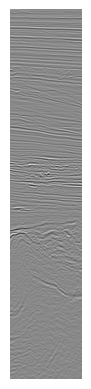

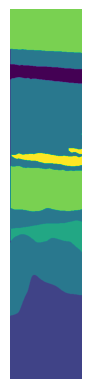

In [4]:
img_size = (992, 192)
image=train_image[10]
plt.imshow(image, cmap='gray')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()
image_label=train_label[10]
plt.imshow(image_label, cmap='viridis')  # Use cmap='gray' for grayscale images
plt.axis('off')  # Turn off axis labels
plt.show()

In [6]:
checkpoint_filepath = './checkpoints/'+'grad_test'+'/checkpoint_'+'grad_test'

if not os.path.exists('./checkpoints'):
    os.makedirs('./checkpoints')

if not os.path.exists('./checkpoints/'+'grad_test'):
    os.makedirs('./checkpoints/'+'grad_test')
#Callback function   
callbacks = [
    tf.keras.callbacks.EarlyStopping(
        # Stop training when `val_loss` is no longer improving
        monitor="val_loss",
        min_delta=1e-4,
        patience=5,
        verbose=1,
    ),
    tf.keras.callbacks.ModelCheckpoint(
        filepath=checkpoint_filepath,
        save_weights_only=True,
        monitor= "val_acc",
        mode='max',
        save_best_only=True
    )
]
#Definition of Optimizers
opt=tf.keras.optimizers.Adam(learning_rate=1e-4)
opt_name="Adam"

#Definition of Loss Function
loss=SparseCategoricalFocalLoss(gamma=4, from_logits=True)
loss_name="Sparce Categorical Focal Loss, Gamma: " + str(4)

#Model Compilation and Training
model.compile(optimizer=opt,
                    loss=loss,
                metrics=['acc'])

history = model.fit(train_image, train_label, batch_size=10, epochs=5,
                        callbacks=callbacks,
                        validation_data=(val_image, val_label))     
#The best epoch is saved 
model.load_weights(checkpoint_filepath)

Epoch 1/5


2023-12-01 18:09:31.720854: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:447] Could not create cudnn handle: CUDNN_STATUS_INTERNAL_ERROR
2023-12-01 18:09:31.720916: E tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:451] Memory usage: 1507328 bytes free, 4091478016 bytes total.
2023-12-01 18:09:31.720936: W tensorflow/core/framework/op_kernel.cc:1839] OP_REQUIRES failed at conv_ops_impl.h:1592 : UNIMPLEMENTED: DNN library is not found.


UnimplementedError: Graph execution error:

Detected at node attunet/attunet_down0_0/Conv2D defined at (most recent call last):
  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/runpy.py", line 197, in _run_module_as_main

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/runpy.py", line 87, in _run_code

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/ipykernel_launcher.py", line 17, in <module>

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/traitlets/config/application.py", line 1046, in launch_instance

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/ipykernel/kernelapp.py", line 736, in start

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/tornado/platform/asyncio.py", line 199, in start

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/asyncio/base_events.py", line 601, in run_forever

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/asyncio/base_events.py", line 1905, in _run_once

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/asyncio/events.py", line 80, in _run

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 516, in dispatch_queue

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 505, in process_one

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 412, in dispatch_shell

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/ipykernel/kernelbase.py", line 740, in execute_request

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/ipykernel/ipkernel.py", line 422, in do_execute

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/ipykernel/zmqshell.py", line 546, in run_cell

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3024, in run_cell

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3079, in _run_cell

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/IPython/core/async_helpers.py", line 129, in _pseudo_sync_runner

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3284, in run_cell_async

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3466, in run_ast_nodes

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/IPython/core/interactiveshell.py", line 3526, in run_code

  File "/tmp/ipykernel_11116/1828405578.py", line 38, in <module>

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/engine/training.py", line 1783, in fit

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/engine/training.py", line 1377, in train_function

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/engine/training.py", line 1360, in step_function

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/engine/training.py", line 1349, in run_step

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/engine/training.py", line 1126, in train_step

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/engine/training.py", line 589, in __call__

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/engine/functional.py", line 515, in call

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/engine/functional.py", line 672, in _run_internal_graph

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 65, in error_handler

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/engine/base_layer.py", line 1149, in __call__

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/utils/traceback_utils.py", line 96, in error_handler

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py", line 290, in call

  File "/home/gabriel/miniconda3/envs/seismic_tf/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py", line 262, in convolution_op

DNN library is not found.
	 [[{{node attunet/attunet_down0_0/Conv2D}}]] [Op:__inference_train_function_19480]

In [ ]:
last_conv_layer_name = "attunet_output_activation"
last_conv_layer = model.get_layer(last_conv_layer_name)
# Define the class index for which you want to visualize the Grad-CAM
class_index = 0  # Replace with the index of the desired class
model = Model(model.inputs, [model.output, last_conv_layer.output])

# THE MODEL MUST BE TRAINED BY NOW

In [ ]:
# Function to generate Grad-CAM
def generate_grad_cam(img_array):
    # Expand dimensions to create a batch of size 1
    img_array = np.expand_dims(img_array, axis=0)

    # Get the output and the feature map
    preds, last_conv_output = model(img_array)

    # Gradient of the predicted class with respect to the output feature map
    gradient = preds[:, class_index]

    # Compute the gradient of the feature map with respect to the output
    grads = tf.GradientTape().gradient(gradient, last_conv_layer.output)[0]

    # Global average pooling to obtain the heatmap weights
    pooled_grads = tf.reduce_mean(grads, axis=(0, 1, 2))
    
    # Multiply each feature map by its corresponding gradient weight
    last_conv_layer_output = last_conv_layer.output[0]
    heatmap = tf.reduce_mean(last_conv_layer_output * pooled_grads, axis=-1)

    # Apply ReLU to the heatmap
    heatmap = tf.maximum(heatmap, 0)

    # Normalize the heatmap
    heatmap /= tf.reduce_max(heatmap)

    return heatmap.numpy()

In [ ]:
img_array = val_image[10]

# Generate Grad-CAM
heatmap = generate_grad_cam(img_array)

# Resize the heatmap to the original image size
heatmap = cv2.resize(heatmap, (img_array.shape[0], img_array.shape[1]))

# Convert the heatmap to RGB
heatmap = np.uint8(255 * heatmap)

# Apply the heatmap to the original image
heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
superimposed_img = cv2.addWeighted(img_array.astype('uint8'), 0.5, heatmap, 0.5, 0)

# Display the original image, heatmap, and superimposed image
plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.imshow(img_array)
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(heatmap)
plt.title('Grad-CAM Heatmap')

plt.subplot(1, 3, 3)
plt.imshow(superimposed_img)
plt.title('Superimposed Image')

plt.show()